In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rkiattisak_salaly_prediction_for_beginer_path = kagglehub.dataset_download('rkiattisak/salaly-prediction-for-beginer')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv


In [3]:
df = pd.read_csv("/content/Salary Data.csv")
df


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [6]:
df.replace(['', 'NA', 'NaN','nan'], np.nan, inplace=True)
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [7]:
print(df['Age'].unique())  # Check unique values in the Age column
print(df['Years of Experience'].unique())  # Check for Years of Experience
print(df['Salary'].unique())  # Check for Salary

[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. nan]
[ 5.   3.  15.   7.  20.   2.  12.   4.   1.  10.  18.   6.  14.  16.
  0.  22.  19.   9.  13.  11.  25.  21.   8.  17.  23.  24.   0.5  1.5
  nan]
[ 90000.  65000. 150000.  60000. 200000.  55000. 120000.  80000.  45000.
 110000.  75000. 140000. 130000.  40000. 125000. 115000.  35000. 180000.
 190000.  50000. 250000. 170000. 160000.  85000.  95000. 105000.  70000.
 100000.  30000. 135000. 220000. 175000. 185000.     nan 145000. 155000.
    350.]


In [8]:
df['Years of Experience'] = df['Years of Experience'].replace(0, np.nan)
# Remove rows with Salary less than a reasonable threshold (e.g., 10,000)
df = df[df['Salary'] > 10000]
df = df.dropna(subset=['Age', 'Years of Experience', 'Salary'])


In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


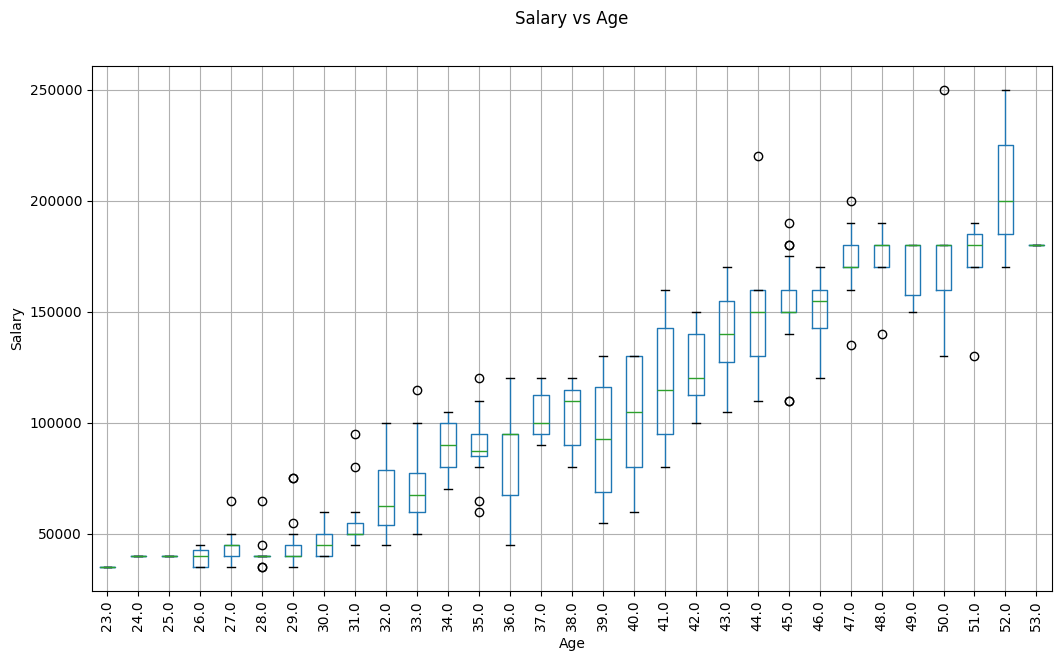

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary','Age',ax = ax)
plt.suptitle('Salary vs Age')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


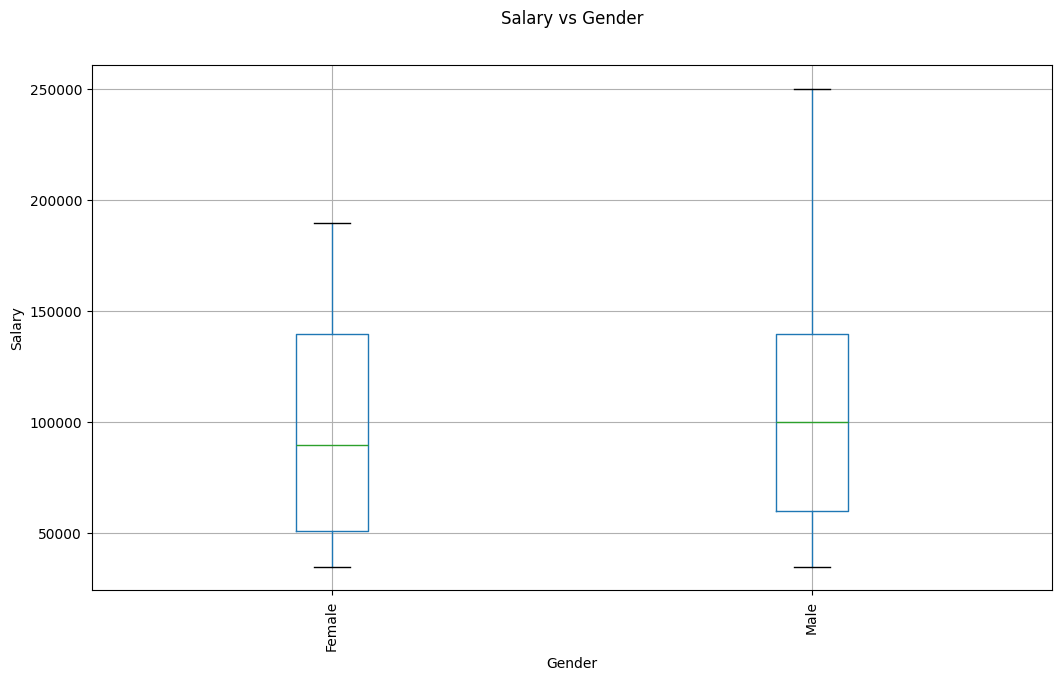

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary','Gender',ax = ax)
plt.suptitle('Salary vs Gender')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

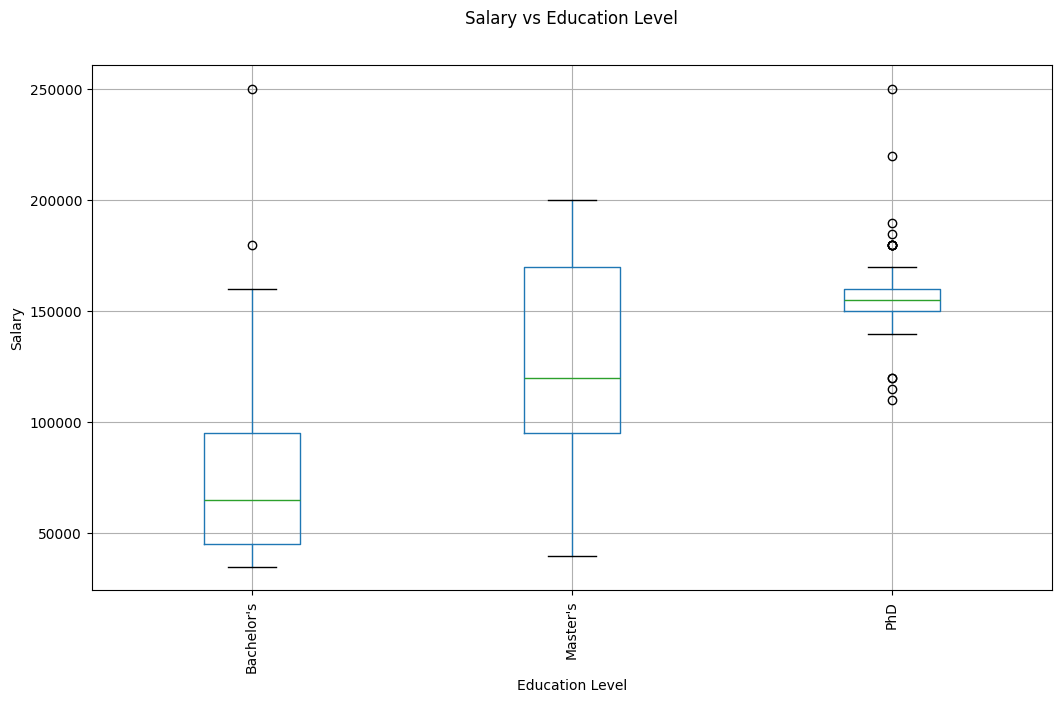

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary','Education Level',ax = ax)
plt.suptitle('Salary vs Education Level')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

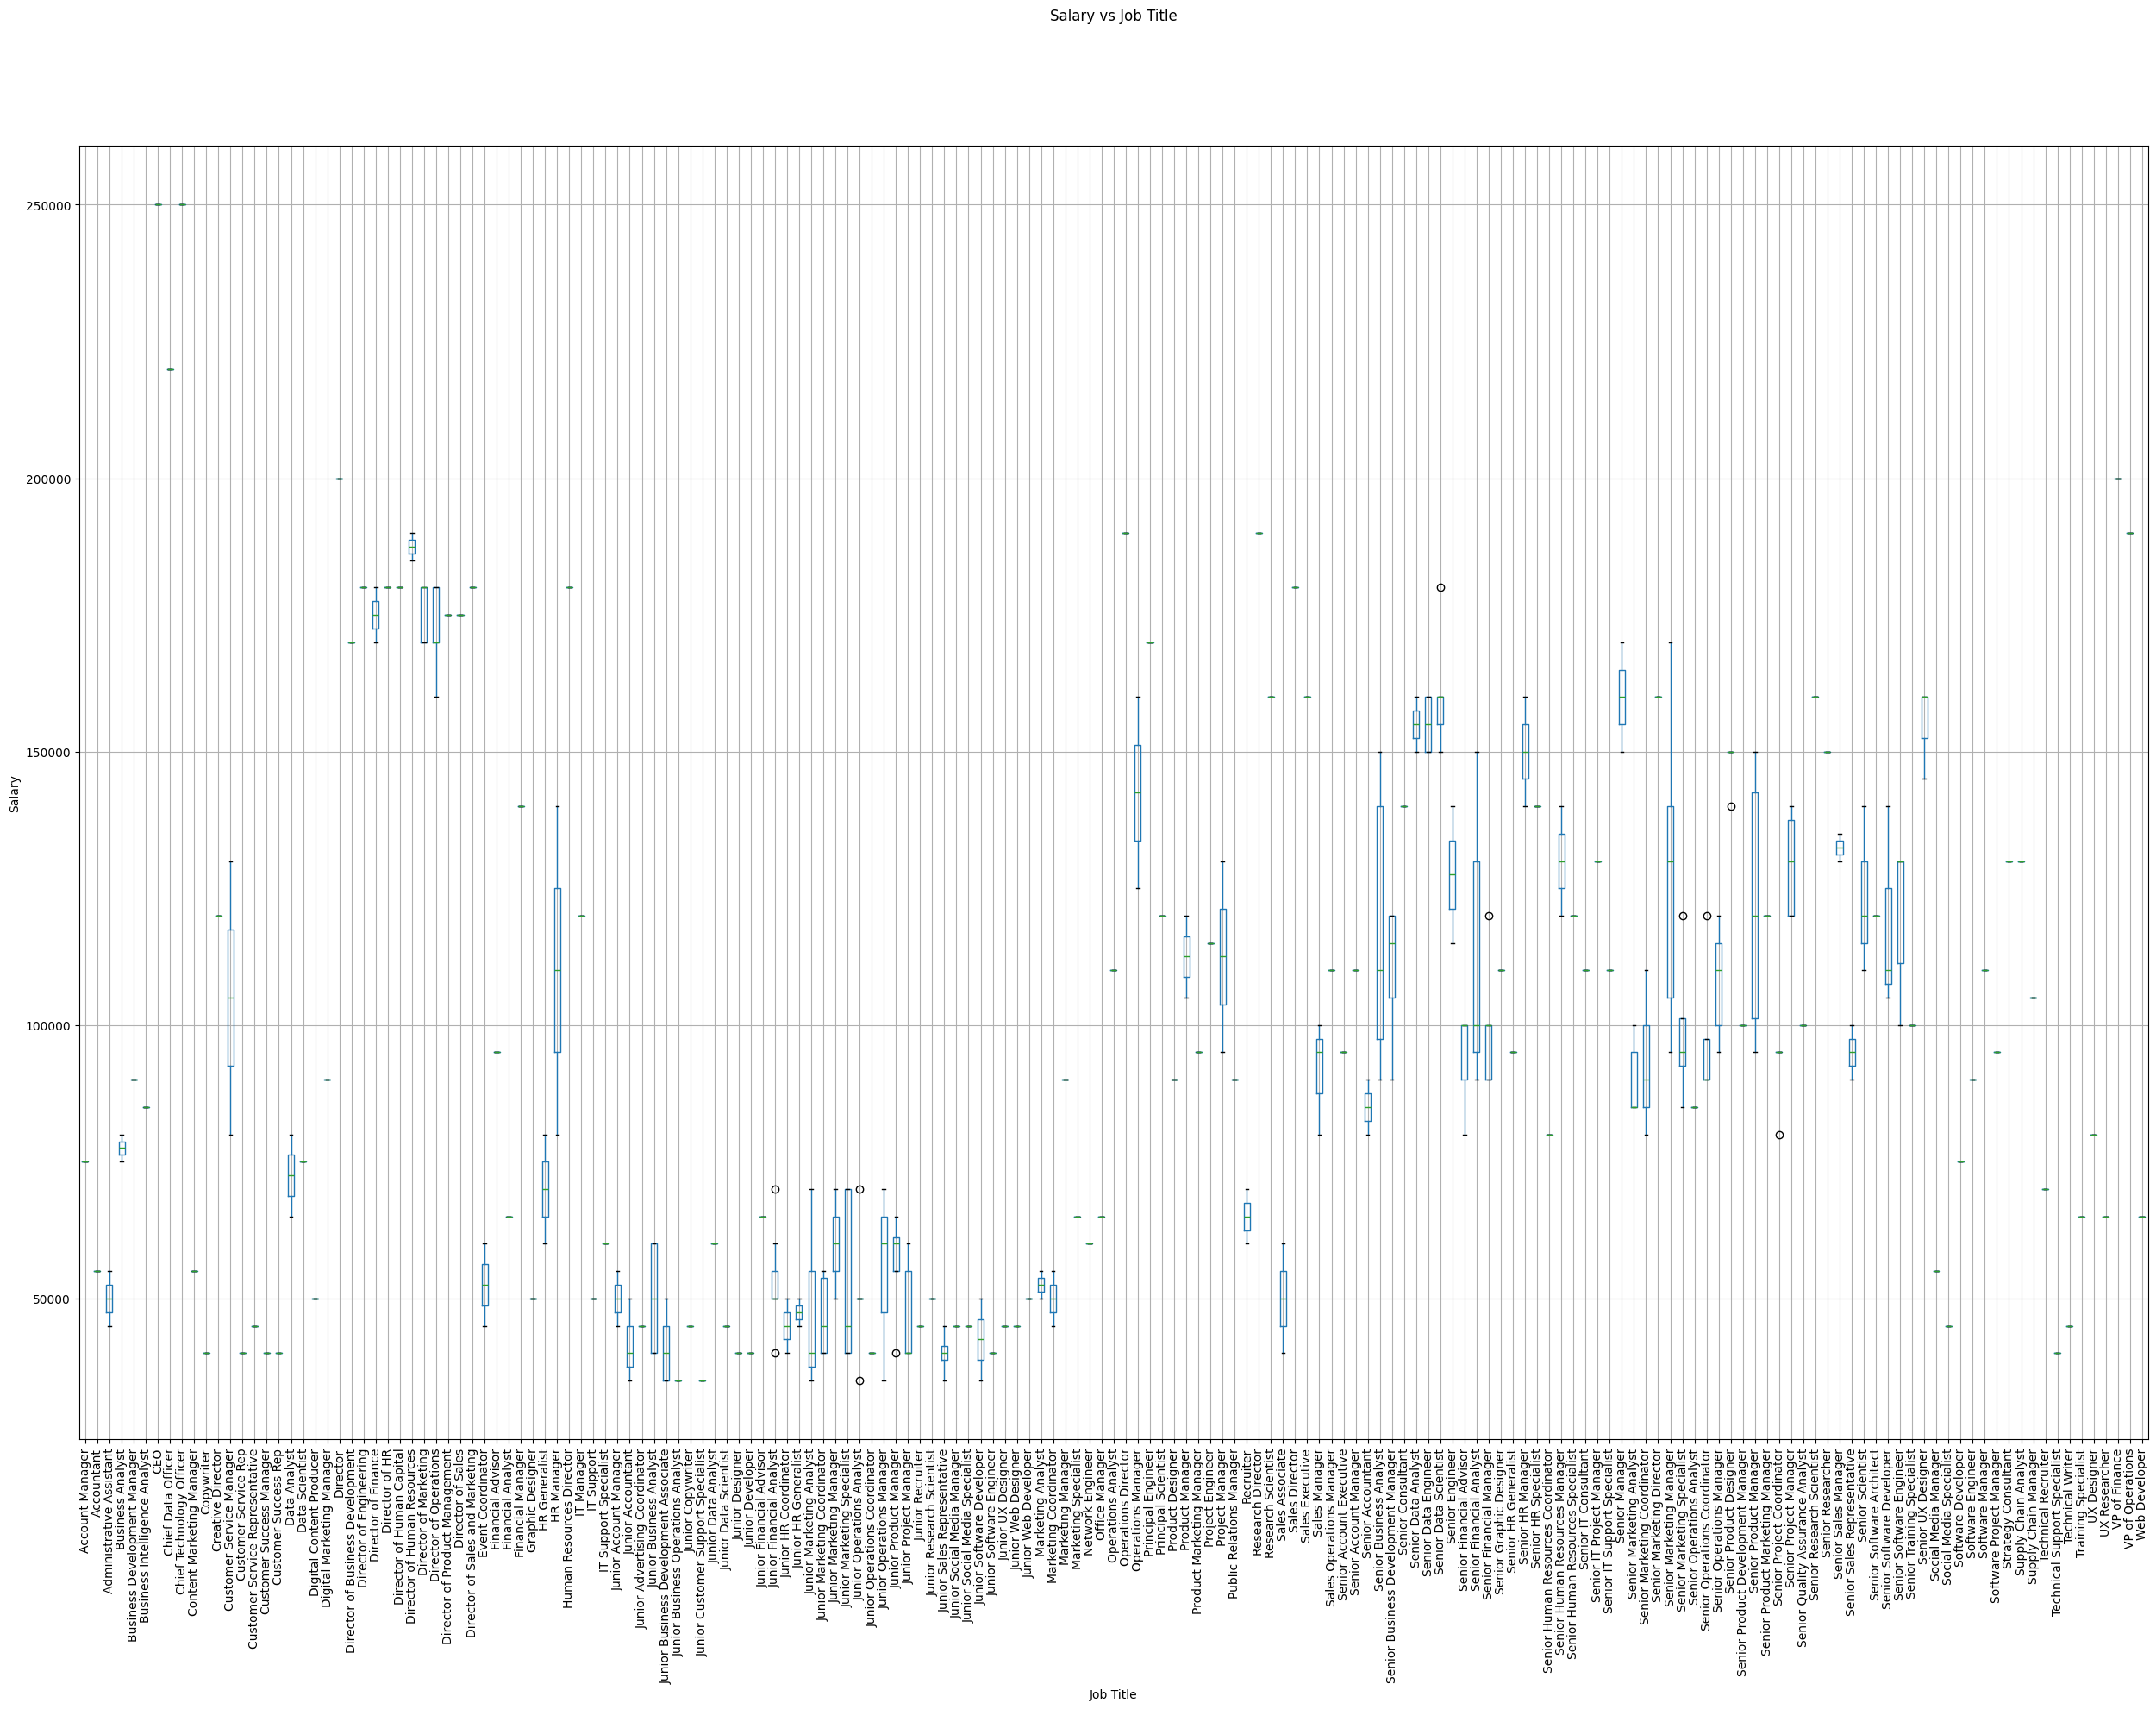

In [13]:
fig, ax = plt.subplots(1,1, figsize=(30,20))
df.boxplot('Salary','Job Title',ax = ax)
plt.suptitle('Salary vs Job Title')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

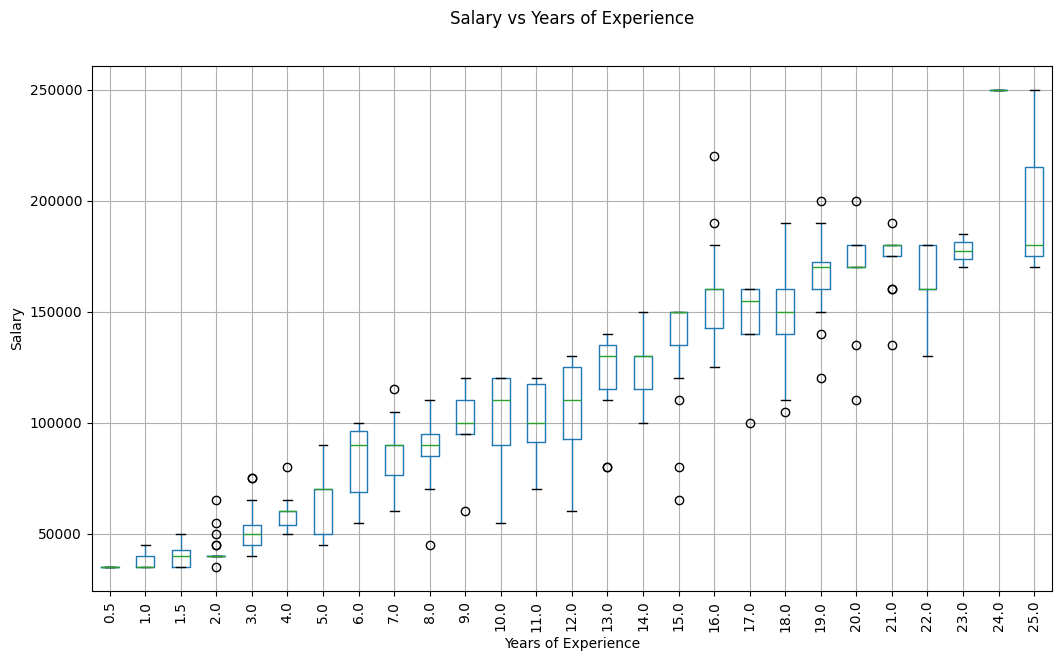

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Years of Experience', ax=ax)
plt.suptitle('Salary vs Years of Experience')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)
encoded_columns = ohe.fit_transform(df[['Gender', 'Education Level','Job Title']])
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(['Gender', 'Education Level','Job Title']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(['Gender', 'Education Level','Job Title'], axis=1, inplace=True)
df

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,3.0,65000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45.0,15.0,150000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.0,7.0,60000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.0,20.0,200000.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Fill missing values in the one-hot encoded columns with 0
df = df.dropna()

# Verify no missing values remain
print(df.isnull().sum())



Age                           0
Years of Experience           0
Salary                        0
Gender_Female                 0
Gender_Male                   0
                             ..
Job Title_UX Designer         0
Job Title_UX Researcher       0
Job Title_VP of Finance       0
Job Title_VP of Operations    0
Job Title_Web Developer       0
Length: 179, dtype: int64


In [19]:
print(df.shape)

(363, 179)


In [26]:
x = df.drop(columns= 'Salary')
y = df['Salary']

In [27]:
x.dropna()

,Age,Years of Experience,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45.0,15.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.0,20.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,35.0,8.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,43.0,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
366,31.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,41.0,14.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y.dropna()

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
364,90000.0
365,170000.0
366,50000.0
367,150000.0


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)


In [30]:

x_train.isnull().sum()


,0
Age,0
Years of Experience,0
Gender_Female,0
Gender_Male,0
Education Level_Bachelor's,0
...,...
Job Title_UX Designer,0
Job Title_UX Researcher,0
Job Title_VP of Finance,0
Job Title_VP of Operations,0


In [31]:
x_train


,Age,Years of Experience,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
286,33.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,53.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,29.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,42.0,14.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,51.0,23.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,28.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,28.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,46.0,17.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354,31.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
y_train.isnull().sum()

np.int64(0)

In [33]:
y_train.head()


,Salary
286,60000.0
121,180000.0
32,75000.0
37,115000.0
158,185000.0


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [35]:
rf = RandomForestRegressor()
xg = XGBRegressor()
n = KNeighborsRegressor()

In [36]:
rf.fit(x_train,y_train)


RandomForestRegressor()

In [37]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
n.fit(x_train,y_train)

KNeighborsRegressor()

In [39]:
y_pred_rf = rf.predict(x_test)
y_pred_xg = xg.predict(x_test)
y_pred_knn = n.predict(x_test)

In [40]:
train_accuracy_rf = rf.score(x_train,y_train)
test_accuracy_rf = rf.score(x_test, y_test)

train_accuracy_rf

0.983903444713865

In [41]:
train_accuracy_rf
test_accuracy_rf

0.8200530764785415

In [42]:
train_accuracy_xg = xg.score(x_train,y_train)
test_accuracy_xg = xg.score(x_test, y_test)
train_accuracy_xg

0.9961088916439618

In [43]:
test_accuracy_xg

0.7898402509907363

In [44]:
train_accuracy_knn = n.score(x_train,y_train)
test_accuracy_knn = n.score(x_test, y_test)
train_accuracy_knn

0.9230026461898616

In [45]:
test_accuracy_knn

0.8139959874389393

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

In [47]:
print("Random Forest regressor Scores")
print('mae:', mae)
print('mse:', mse)
print('r2:', r2)

Random Forest regressor Scores
mae: 12532.5
mse: 343818588.5416667
r2: 0.8200530764785415


In [48]:
mae = mean_absolute_error(y_test, y_pred_xg)
mse = mean_squared_error(y_test, y_pred_xg)
r2 = r2_score(y_test, y_pred_xg)

In [49]:
print("XGBoosting Regressor Scores")
print('mae:', mae)
print('mse:', mse)
print('r2:', r2)

XGBoosting Regressor Scores
mae: 13947.179622395834
mse: 401545227.1070333
r2: 0.7898402509907363


In [50]:
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

In [51]:
print("KNN Regressor Scores")
print('mae:', mae)
print('mse:', mse)
print('r2:', r2)

KNN Regressor Scores
mae: 13675.0
mse: 355391666.6666667
r2: 0.8139959874389393


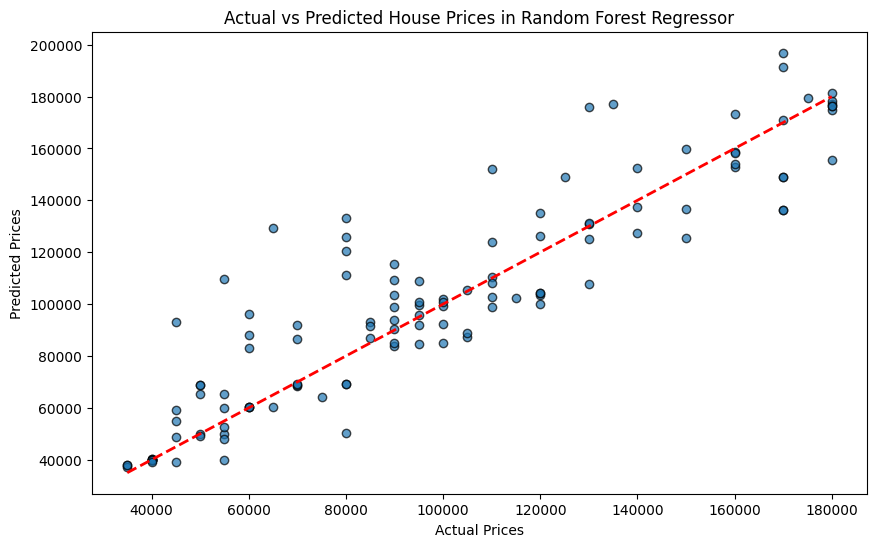

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_rf, alpha=0.7,edgecolors='k')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max(),],'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices in Random Forest Regressor')
plt.show()

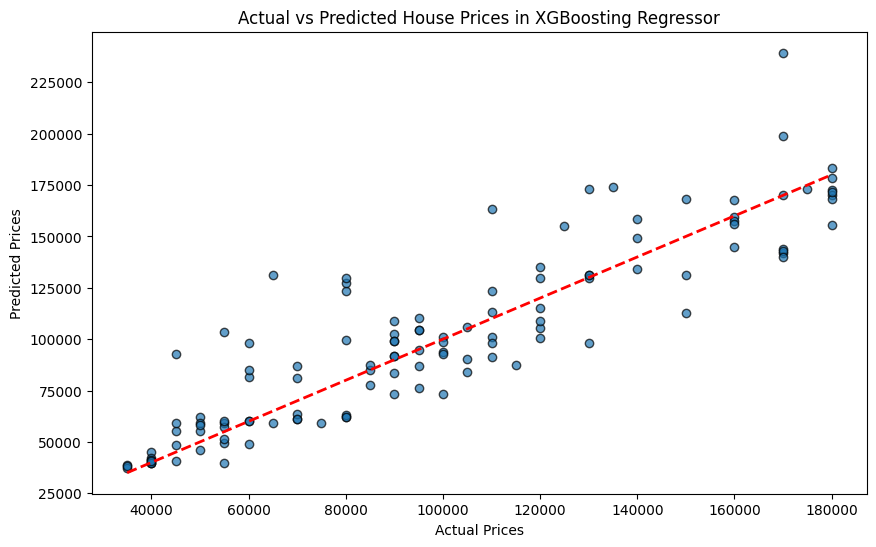

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_xg, alpha=0.7,edgecolors='k')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max(),],'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices in XGBoosting Regressor')
plt.show()

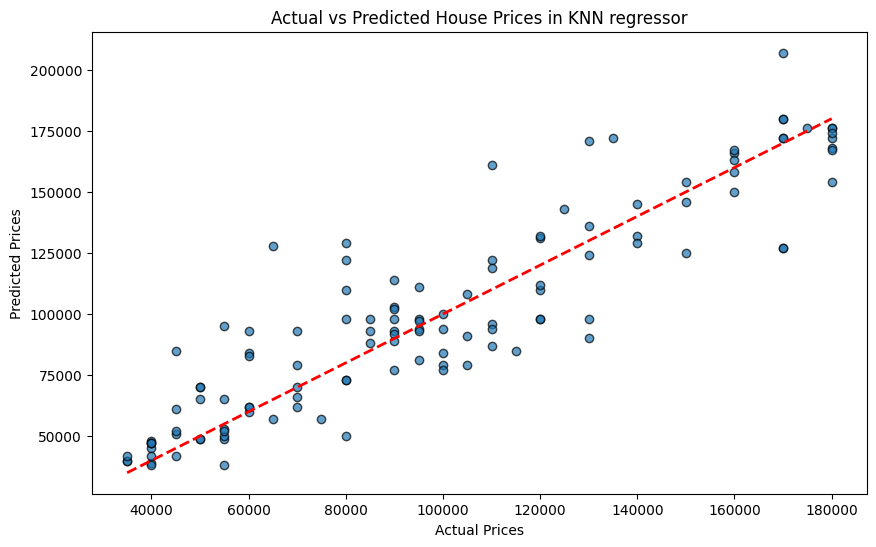

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_knn, alpha=0.7,edgecolors='k')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max(),],'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices in KNN regressor')
plt.show()